# Analysis of Mancala simulations

In [25]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
filepath = '../data/all_simulations_minmax.csv'
data = pd.read_csv(filepath)
data.describe()

,player_1_score,player_2_score,player_1_moves,player_2_moves,total_moves,n_start_marbles,n_cups,first_move
count,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.0,490000.0,490000.00000
mean,26.439004,21.560996,54.758182,44.484337,99.242518,4.0,6.0,3.48610
std,7.305852,7.305852,16.043527,15.982034,13.446112,0.0,0.0,1.72012
min,7.000000,3.000000,6.000000,4.000000,26.000000,4.0,6.0,1.00000
25%,21.000000,16.000000,43.000000,33.000000,90.000000,4.0,6.0,2.00000
50%,27.000000,21.000000,54.000000,42.000000,100.000000,4.0,6.0,4.00000
75%,32.000000,27.000000,66.000000,55.000000,108.000000,4.0,6.0,5.00000
max,45.000000,41.000000,109.000000,107.000000,157.000000,4.0,6.0,6.00000


In [27]:
# duplicated rows
data.duplicated().sum()

196627

Many duplicates, reduce number of simulations

## Random-Random strategy, distribution of scores/moves

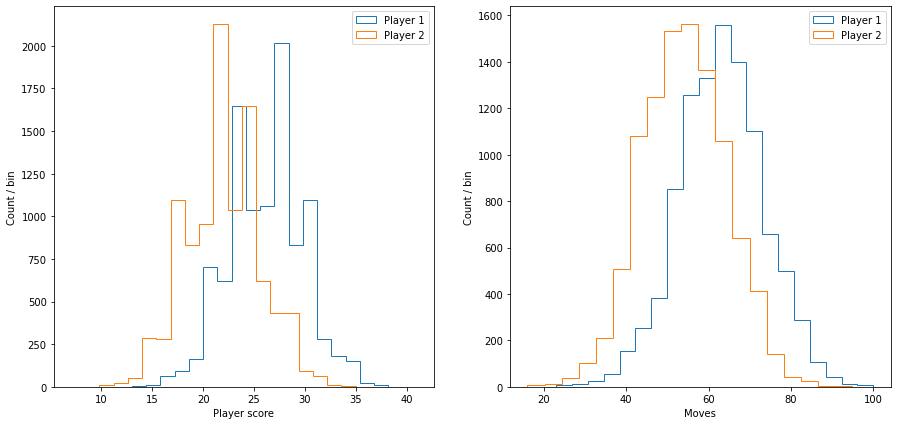

972

In [28]:
view = data[ (data['player_one_strategy'] == 'random') & (data['player_two_strategy'] == 'random') ]
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(view['player_1_score'], label='Player 1', bins=20, histtype='step')
ax[0].hist(view['player_2_score'], label='Player 2', bins=20, histtype='step')
ax[0].set_xlabel('Player score')
ax[0].set_ylabel('Count / bin')
ax[0].legend()

ax[1].hist(view['player_1_moves'], bins=20, histtype='step', label='Player 1')
ax[1].hist(view['player_2_moves'], bins=20, histtype='step', label='Player 2')
ax[1].set_xlabel('Moves')
ax[1].set_ylabel('Count / bin')
ax[1].legend()

plt.show()

view.duplicated().sum()

## Random-Random strategy: no. of moves for each game outcome

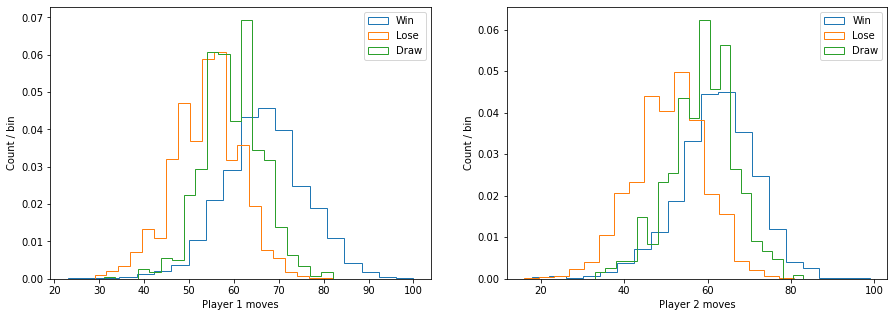

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(view[view['player_1_result'] == 'win']['player_1_moves'],  label='Win',  bins=20, histtype='step', density=True)
ax[0].hist(view[view['player_1_result'] == 'lose']['player_1_moves'], label='Lose', bins=20, histtype='step', density=True)
ax[0].hist(view[view['player_1_result'] == 'draw']['player_1_moves'], label='Draw', bins=20, histtype='step', density=True)

ax[0].set_xlabel('Player 1 moves')
ax[0].set_ylabel('Count / bin')
ax[0].legend(loc='best')

ax[1].hist(view[view['player_2_result'] == 'win']['player_2_moves'],  label='Win',  bins=20, histtype='step', density=True)
ax[1].hist(view[view['player_2_result'] == 'lose']['player_2_moves'], label='Lose', bins=20, histtype='step', density=True)
ax[1].hist(view[view['player_2_result'] == 'draw']['player_2_moves'], label='Draw', bins=20, histtype='step', density=True)

ax[1].set_xlabel('Player 2 moves')
ax[1].set_ylabel('Count / bin')
ax[1].legend(loc='best')

plt.show()

## win rate vs first move

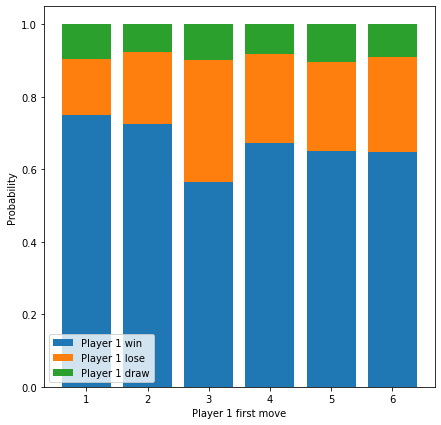

In [30]:
initial_moves = view['first_move'].unique()
initial_moves = np.sort(initial_moves)

win_probs  = pd.DataFrame(columns=['prob'], index=initial_moves, dtype=float)
lose_probs = pd.DataFrame(columns=['prob'], index=initial_moves, dtype=float)
draw_probs = pd.DataFrame(columns=['prob'], index=initial_moves, dtype=float)

for move in initial_moves:
    first_move_view = view[ view['first_move'] == move ]
    norm = len(first_move_view)
    
    win_probs['prob'].loc[move]  = len(first_move_view[ first_move_view['player_1_result'] == 'win' ]) / norm
    lose_probs['prob'].loc[move] = len(first_move_view[ first_move_view['player_1_result'] == 'lose' ]) / norm
    draw_probs['prob'].loc[move] = len(first_move_view[ first_move_view['player_1_result'] == 'draw' ]) / norm
    
    
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.bar(win_probs.index,  win_probs['prob'],  label='Player 1 win')
ax.bar(lose_probs.index, lose_probs['prob'], label='Player 1 lose', bottom=win_probs['prob'])
ax.bar(draw_probs.index, draw_probs['prob'], label='Player 1 draw', bottom=lose_probs['prob']+win_probs['prob'])

ax.set_xlabel('Player 1 first move')
ax.set_ylabel('Probability')

plt.legend(loc='best')

plt.show()

# Plot win rate vs first move, for all strategies

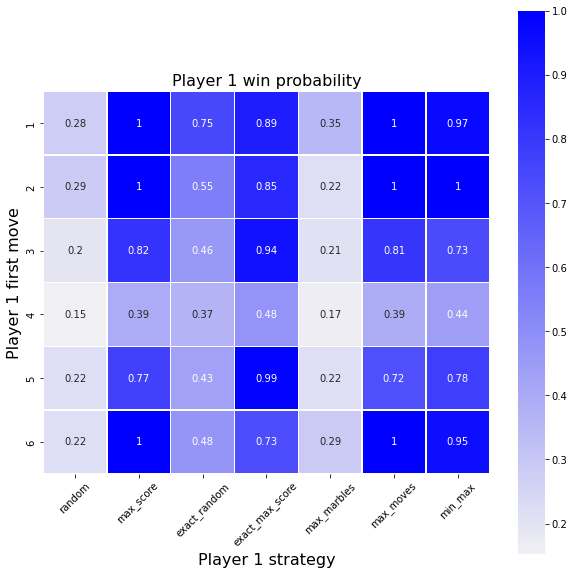

In [33]:
initial_moves = data['first_move'].unique()
initial_moves = np.sort(initial_moves)

strats = data['player_one_strategy'].unique()

win_probs_strats = pd.DataFrame(columns=strats, index=initial_moves, dtype=float)

for strat in strats:
    strategy_view = data[ data['player_one_strategy'] == strat ]
    for move in initial_moves:
        first_move_view = strategy_view[ strategy_view['first_move'] == move ]
        norm = len(first_move_view)
        prob = len(first_move_view[ first_move_view['player_1_result'] == 'win' ]) / norm
        win_probs_strats[strat].loc[move] = prob

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(win_probs_strats, annot=True, linewidths=0.5, ax=ax, cmap=cmap, square=True)
ax.set_xlabel('Player 1 strategy', fontsize=16)
ax.set_xticklabels(win_probs_strats.columns, rotation=45)
ax.set_ylabel('Player 1 first move', fontsize=16)
ax.set_title('Player 1 win probability', fontsize=16)
plt.show()